## I'm going to analyze the Arizona Diamondbacks' attendance numbers since their inception in 1998.

In [127]:
import urllib2
import re
import sys

output = False
opponents = list()
attendance = list()
opp_div = list()
dates=list()
team='ARI'

franchise_dict = {'FLA':'MIA','TBD':'TBR','CAL':'ANA','LAA':'ANA','MON':'WSN'}
def team_name_updated(team_name):
    if team_name in franchise_dict:
        return franchise_dict[team_name]
    else:
        return team_name

for year in range(1998,2020):
    sys.stdout.write('Getting data for {0} ... '.format(year))
    output = False
    for line in urllib2.urlopen("http://baseball-reference.com/teams/{1}/{0}-schedule-scores.shtml".format(year,team)):
        if 'all_team_schedule' in str(line):
            output = True
        elif '<em>Rank and Games Back are always at the end of all games played on that date.</em></div>' in str(line):
            output = False
        elif output:
            #The first group just ensures that it is a home game
            m = re.search(r'data-stat="date_game" csk="(?P<date>\d\d\d\d-\d\d-\d\d)".*?'
                          r'data-stat="homeORvis" ></td>.*?'
                          r'data-stat="opp_ID" ><a href="/teams/\w\w\w/{0}.shtml">(?P<opponent>[A-Z][A-Z][A-Z]).*?'
                          r'data-stat="attendance" >(?P<attendance>\d+,\d+)'.format(year), str(line))
            if m is not None:
                opponents.append(m.group('opponent'))
                attendance.append(float(m.group("attendance").replace(',','')))
                dates.append(m.group('date'))
                
                
    sys.stdout.write('Done\n')
                #print(year, m.group('team'), m.group('games'), m.group('wins'), m.group('losses'), m.group('title'), m.group('Win_Loss_Percentage'))



Getting data for 1998 ... Done
Getting data for 1999 ... Done
Getting data for 2000 ... Done
Getting data for 2001 ... Done
Getting data for 2002 ... Done
Getting data for 2003 ... Done
Getting data for 2004 ... Done
Getting data for 2005 ... Done
Getting data for 2006 ... Done
Getting data for 2007 ... Done
Getting data for 2008 ... Done
Getting data for 2009 ... Done
Getting data for 2010 ... Done
Getting data for 2011 ... Done
Getting data for 2012 ... Done
Getting data for 2013 ... Done
Getting data for 2014 ... Done
Getting data for 2015 ... Done
Getting data for 2016 ... Done
Getting data for 2017 ... Done
Getting data for 2018 ... Done
Getting data for 2019 ... Done


['1998-03-31',
 '1998-04-01',
 '1998-04-02',
 '1998-04-03',
 '1998-04-04',
 '1998-04-05',
 '1998-04-17',
 '1998-04-18',
 '1998-04-19',
 '1998-04-20']

#### Plotting games against each opponent: NL West teams have the most games, followed by other NL teams.

Populating the interactive namespace from numpy and matplotlib


C:\Users\Thomas\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['boxplot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


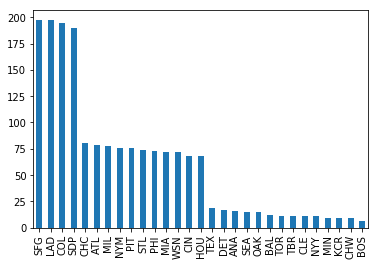

In [128]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

opponents = pd.Series(opponents)
opponents = opponents.apply(team_name_updated)
opponents.value_counts().plot(kind='bar')


In [129]:
df = pd.DataFrame(columns = ['Opponent','Attendance'])
df['Opponent'] = opponents
df['Attendance'] = pd.Series(attendance)
df.head()

,Opponent,Attendance
0,COL,47484.0
1,COL,43758.0
2,COL,42876.0
3,SFG,45590.0
4,SFG,47047.0


Text(0.5,1,'Arizona Diamondbacks Home Attendance By Opponent')

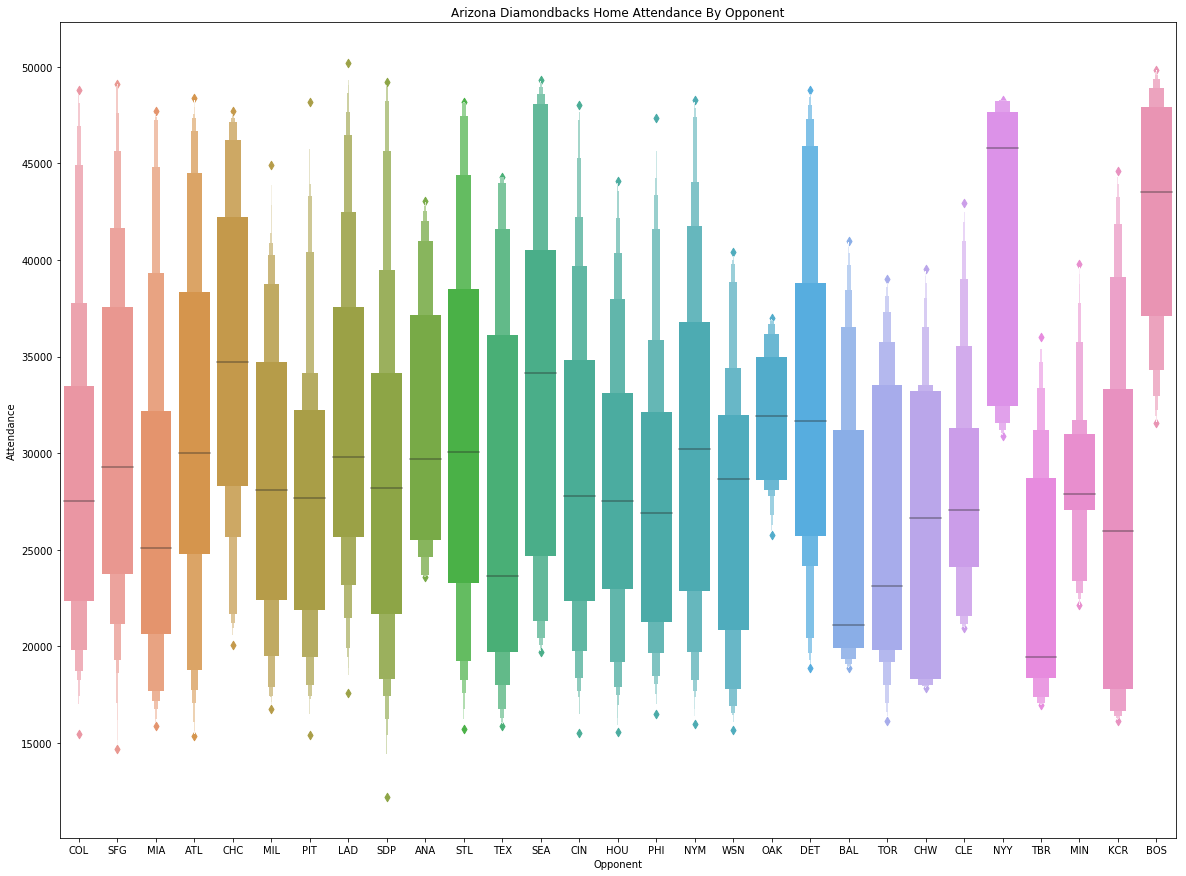

In [130]:
import seaborn as sns
fig, ax = pyplot.subplots(figsize=(20,15))

boxplot = sns.boxenplot(data = df,x='Opponent',y='Attendance')
title('Arizona Diamondbacks Home Attendance By Opponent')


### Here we see the attendance numbers by opponent.  The Yankees and Red Sox have the highest attendance rates: they don't come to town very often, and are very popular nationwide.  The Cubs, Indians, and Tigers also have relatively high attendance rates.  Since Arizona has a large population of former Midwesterners, this makes sense.

In [131]:
NLW = ['ARI','SDP','SFG','LAD','COL']
NLE = ['ATL','WSN','PHI','NYM','MIA']
NLC = ['STL','CHC','MIL','PIT','CIN']
ALW = ['TEX','HOU','OAK','ANA','SEA']
ALE = ['BOS','NYY','BAL','TOR','TBR']
ALC = ['CLE','MIN','CHW','KCR','DET']

def get_division(team):
    if team in NLW:
        return 'NL West'
    elif team in NLE:
        return 'NL East'
    elif team in NLC:
        return 'NL Central'
    elif team in ALE:
        return 'AL East'
    elif team in ALC:
        return 'AL Central'
    elif team in ALW:
        return 'AL West'
    
df['Division'] = df['Opponent'].apply(get_division)
df['Division'].value_counts()

NL West       779
NL Central    376
NL East       372
AL West       133
AL Central     55
AL East        51
Name: Division, dtype: int64

Text(0.5,1,"Arizona Diamondbacks Home Attendance By Opponent's Division")

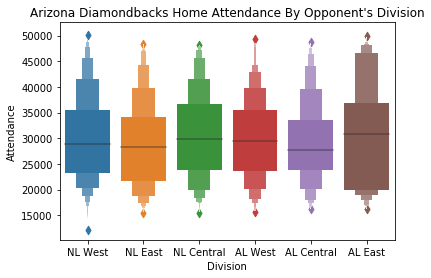

In [132]:
boxplot = sns.boxenplot(data = df,x='Division',y='Attendance')
title("Arizona Diamondbacks Home Attendance By Opponent's Division")

### Interestingly enough, there doesn't seem to be an additional demand for intra-divisional games, as the NL West is on par with most of the other divisions.  The AL East appears to be the highest (again, the Yankees and Red Sox provide a boost there), and all the others are about equal.

Text(0.5,1,'Arizona Diamondbacks Home Attendance for NL West Opponents')

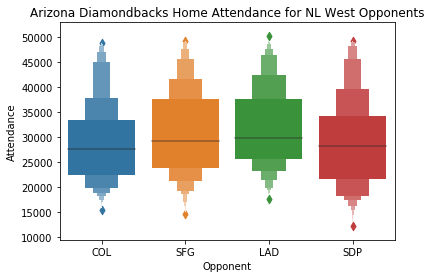

In [133]:
NL_West_df = df[df['Division']=='NL West']

boxplot = sns.boxenplot(data = NL_West_df,x='Opponent',y='Attendance')
title("Arizona Diamondbacks Home Attendance for NL West Opponents")

### Within the NL West, the Dodgers are the most popular team (California transplants are very common in the valley), but the Padres look like the least popular, probably because they have a smaller fan base to begin with, and aren't seen as a significan rival by the hometown fans.  The Rockies are pretty much in the middle, which is about what I expected

In [134]:
df['Date'] = pd.to_datetime(dates)
df.head()

,Opponent,Attendance,Division,Date
0,COL,47484.0,NL West,1998-03-31
1,COL,43758.0,NL West,1998-04-01
2,COL,42876.0,NL West,1998-04-02
3,SFG,45590.0,NL West,1998-04-03
4,SFG,47047.0,NL West,1998-04-04


In [135]:
df['Month'] = [date.month for date in df['Date']]
df.head()

,Opponent,Attendance,Division,Date,Month
0,COL,47484.0,NL West,1998-03-31,3
1,COL,43758.0,NL West,1998-04-01,4
2,COL,42876.0,NL West,1998-04-02,4
3,SFG,45590.0,NL West,1998-04-03,4
4,SFG,47047.0,NL West,1998-04-04,4


Text(0.5,1,'Arizona Diamondbacks Home Attendance by Month')

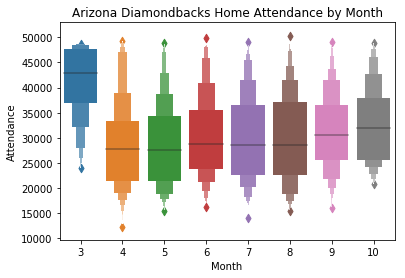

In [136]:
boxplot = sns.boxenplot(data = df,x='Month',y='Attendance')
title("Arizona Diamondbacks Home Attendance by Month")

### Well this is pretty surprising.  March games (usually just opening weekend) have significantly higher attendance than April.  The low outlier is likely the Sydney, Australia series that the D-Backs played in 2014.  April is much lower than March, and no higher than May.  This means that for the opening week attendance boost that the D-Backs usually gets (in many seasons there aren't any March games), there is a steep drop-off later in the month.
### Attendance notably increases in September and October, which is interesting for a team that has made the playoffs in less than half of their seasons.  Perhaps the years in which they were contenders is the only factor boosting those numbers.

Text(0.5,1,'Arizona Diamondbacks Home Attendance by Day of the Week')

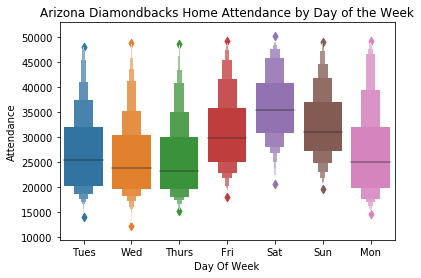

In [137]:
#def day_of_week(date):
#    return date.weekday()

days_of_week = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
df['Day Of Week'] = df['Date'].apply(lambda x: days_of_week[x.weekday()])


df.head()
boxplot = sns.boxenplot(data = df,x='Day Of Week',y='Attendance')
title("Arizona Diamondbacks Home Attendance by Day of the Week")


### This is also not quite what I would expect.  From my personal experience, Friday games are more crowded than any other day, but it appears that Saturday and Sunday games are actually more crowded.  Giveaways tend to happen on Saturdays (for collectibles like bobbleheads and T-shirts) and Sundays (for kids' items), so maybe this causes the boost in attendance on those days.